## Results of Host Prediction
### Dataset: EMBL mapping, Vertebrates, Non-IDV

**Models**: FNN, CNN, RNN, LSTM, TF

**Positional Embedding**: Sin-Cos

**Maximum Sequence Length**: 1036

**Classification**: Multi-class

**\# classes**: 5

**\# train samples** = 

**\# validation samples** = 

**\# test samples** = 

In [2]:
import seaborn

In [3]:
! pip install statannotations
! pip install statsmodels
! pip install seaborn==0.11.0

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     |████████████████████████████████| 292 kB 2.7 MB/s eta 0:00:01
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.0
    Uninstalling seaborn-0.12.0:
      Successfully uninstalled seaborn-0.12.0
Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     |████████████████████████████████| 283 kB 2.7 MB/s eta 0:00:01
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.2
    Uninstalling seaborn-0.11.2:
      Successfully uninstalled seaborn-0.11.2


In [4]:
import sys
import os
from scipy.stats import mannwhitneyu, wilcoxon
from statannotations.Annotator import Annotator
sys.path.append(os.path.join(os.getcwd(), "..", "..", "..", "..", ".."))
sys.path.append(os.path.join(os.getcwd(), "..", "..", "..", ".."))
sys.path.append(os.path.join(os.getcwd(), "..", "..", ".."))
sys.path.append(os.path.join(os.getcwd(), "..", ".."))
sys.path

['/home/blessyantony/dev/git/zoonosis/src/jupyter_notebooks/results-analysis/uniref90',
 '/opt/conda/lib/python38.zip',
 '/opt/conda/lib/python3.8',
 '/opt/conda/lib/python3.8/lib-dynload',
 '',
 '/home/blessyantony/.local/lib/python3.8/site-packages',
 '/opt/conda/lib/python3.8/site-packages',
 '/opt/conda/lib/python3.8/site-packages/IPython/extensions',
 '/home/blessyantony/.ipython',
 '/home/blessyantony/dev/git/zoonosis/src/jupyter_notebooks/results-analysis/uniref90/../../../../..',
 '/home/blessyantony/dev/git/zoonosis/src/jupyter_notebooks/results-analysis/uniref90/../../../..',
 '/home/blessyantony/dev/git/zoonosis/src/jupyter_notebooks/results-analysis/uniref90/../../..',
 '/home/blessyantony/dev/git/zoonosis/src/jupyter_notebooks/results-analysis/uniref90/../..']

In [5]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
from scipy.stats import mannwhitneyu
from src.utils import visualization_utils
from statannotations.Annotator import Annotator

In [6]:
sns.__version__

'0.12.0'

In [7]:
itr_col = "itr"
experiment_col = "experiment"
y_true_col = "y_true"
human_col = "Human"
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['figure.autolayout'] = True

DEFAULT_FIGURE_CONFIG = {
    "figsize": (10, 10),
    "xtick.labelsize": 18,
    "ytick.labelsize": 18    
}




In [9]:
# df = pd.read_csv(os.path.join(os.getcwd(), "..", "..", "..", "..", "..", "output/evaluation/uniref90/20240517/host_multi_all_models/host_multi_all_models_evaluation_metrics.csv"))
# df = pd.read_csv(os.path.join(os.getcwd(), "..", "..", "..", "..", "..", "output/evaluation/uniref90/20240611/host_multi_all_models/host_multi_all_models-msl2048_evaluation_metrics.csv"))
df = pd.read_csv(os.path.join(os.getcwd(), "..",  "..", "..", "..", "output/evaluation/uniref90/20240830/host_multi_all_models/host_multi_all_models_final_evaluation_metrics.csv"))
df.drop(columns="Unnamed: 0", inplace=True)
df

,itr,experiment,auprc
0,0,LR,0.433765
1,1,LR,0.428972
2,2,LR,0.440230
3,3,LR,0.464170
4,4,LR,0.437962
...,...,...,...
98,0,Hybd-sl512st128-CLS-vs30,0.568177
99,1,Hybd-sl512st128-CLS-vs30,0.543933
100,2,Hybd-sl512st128-CLS-vs30,0.553612
101,3,Hybd-sl512st128-CLS-vs30,0.458873


In [8]:
df = df.replace({"experiment": {"LR-maxitr5000": "LR", "Protein-BERT": "ProteinBERT", "VirPro-BERT": "VirProBERT"}})

In [11]:
df["experiment"].unique()

array(['LR', 'RF', 'SVM', 'FNN', 'CNN', 'RNN', 'LSTM', 'TF-Enc-(msl2048)',
       'Protein-BERT_old_ds', 'Protein-BERT_new_ds', 'VirPro-BERT-1366',
       'VirPro-BERT-2048', 'Hybd-sl128st64-vs30',
       'Hybd-sl128st64-vs30-BN', 'Hybd-sl128st64-vs30-AE-BN',
       'Hybd-sl128st64-CLS-vs30', 'Hybd-sl256st64-vs30',
       'Hybd-sl256st64-vs30-AE-BN', 'Hybd-sl256st128-CLS-vs30',
       'Hybd-sl256st64-CLS-vs30-AE-BN', 'Hybd-sl512st128-CLS-vs30'],
      dtype=object)

In [12]:
sub_df = df[df["experiment"].isin(["LR", "RF", "SVM", "FNN", "CNN", "RNN", "LSTM", "TF-Enc-(msl2048)", "Protein-BERT_new_ds", "VirPro-BERT-1366", "VirPro-BERT-2048", "Hybd-sl128st64-vs30-AE-BN", "Hybd-sl256st64-CLS-vs30-AE-BN"])]
sub_df

,itr,experiment,auprc
0,0,LR,0.433765
1,1,LR,0.428972
2,2,LR,0.440230
3,3,LR,0.464170
4,4,LR,0.437962
...,...,...,...
93,0,Hybd-sl256st64-CLS-vs30-AE-BN,0.639349
94,1,Hybd-sl256st64-CLS-vs30-AE-BN,0.672554
95,2,Hybd-sl256st64-CLS-vs30-AE-BN,0.703604
96,3,Hybd-sl256st64-CLS-vs30-AE-BN,0.688975


In [26]:
pairs = [("Hybd-sl256st64-CLS-vs30-AE-BN", "Hybd-sl128st64-vs30-AE-BN"),
         ("Hybd-sl256st64-CLS-vs30-AE-BN", "Protein-BERT_new_ds"),
         ("Hybd-sl256st64-CLS-vs30-AE-BN", "VirPro-BERT-1366"),
         ("Hybd-sl256st64-CLS-vs30-AE-BN", "VirPro-BERT-2048")]

def plot_boxplot_w_stat_tests(df, metric, location, ylim):
    
    virprobert_1366_values = df[df["experiment"] == "VirPro-BERT-1366"][metric].values
    virprobert_2048_values = df[df["experiment"] == "VirPro-BERT-2048"][metric].values
    proteinbert_values = df[df["experiment"] == "Protein-BERT_new_ds"][metric].values
    hybd_values_256 = df[df["experiment"] == "Hybd-sl256st64-CLS-vs30-AE-BN"][metric].values
    hybd_values_128 = df[df["experiment"] == "Hybd-sl128st64-vs30-AE-BN"][metric].values
#     lstm_values = df[df["experiment"] == "LSTM"][metric].values
#     tf_enc_values = df[df["experiment"] == "Transformer-Encoder"][metric].values
#     lr_values = df[df["experiment"] == "LR"][metric].values
#     rf_values = df[df["experiment"] == "RF"][metric].values
#     svm_values = df[df["experiment"] == "SVM"][metric].values
    
    p_values = [mannwhitneyu(hybd_values_256, hybd_values_128, alternative="greater").pvalue,
                mannwhitneyu(hybd_values_256, proteinbert_values, alternative="greater").pvalue,
                mannwhitneyu(hybd_values_256, virprobert_1366_values, alternative="greater").pvalue,
                mannwhitneyu(hybd_values_256, virprobert_2048_values, alternative="greater").pvalue]
#                 mannwhitneyu(virprobert_values, svm_values, alternative="greater").pvalue,
#                 mannwhitneyu(virprobert_values, rf_values, alternative="greater").pvalue,
#                 mannwhitneyu(virprobert_values, lr_values, alternative="greater").pvalue]
    print(f"p_values= {p_values}")
    formatted_pvalues = [f"p={p_value:.2e}" for p_value in p_values]
    print(formatted_pvalues)
    
    DEFAULT_FIGURE_CONFIG = {
        "figsize": (16, 10),
        "xtick.labelsize": 20,
        "ytick.labelsize": 20
    }

    plotting_parameters = {
        'data':    df,
        'x':       'experiment',
        'y':       metric,
        "linewidth": 2.5,
        #"edgecolor": "black",
        #"linecolor": "black",
#         "boxprops": {"edgecolor": "black"},
#         "whiskerprops": {"color": "black"},
#         "flierprops": {"color": "black"},
#         "fliersize": 7.0,
#         "medianprops": {"linewidth": 2.5},
        'palette': "deep",
        #"notch": True,
        #"fill": True
    }

    visualization_utils.pre_plot_config(DEFAULT_FIGURE_CONFIG)
    ax = sns.boxplot(**plotting_parameters)
    #sns.swarmplot(data=df, x="experiment", y=metric, ax=ax, color="black")
    
    annotator = Annotator(ax, pairs, **plotting_parameters)
    #annotator.set_custom_annotations(p_values)
    annotator.configure(loc=location)
    #annotator.set_pvalues(p_values)
    annotator.configure(test="Wilcoxon", loc=location)
    ax.set_xlabel("", size=20, labelpad=5)
    ax.set_ylabel(metric.upper(), size=22)
    plt.xticks(rotation=90)
    #visualization_utils.wrap_ticklabels(ax, axis="x", label_width=10, break_long_words=False)
    annotator.apply_and_annotate()
    #annotator.annotate()
    ax.set_ylim(*ylim)
    
    plt.tight_layout()
    # plt.savefig(os.path.join(os.getcwd(), "..", "..", "..", "..", "..", f"output/visualization/temp/host_multi_all_models_{metric}_boxplot_stat.pdf"), bbox_inches="tight")
    #plt.savefig(os.path.join(os.getcwd(), "..", "..", "..", "..", "..", f"output/visualization/uniref90/20240517/host_multi_all_models/host_multi_all_models_{metric}_boxplot_stat.pdf"), bbox_inches="tight")
    plt.show()

p_values= [0.41726581135546437, 0.9939071098223276, 0.9966923245172357, 0.9699485970305668]
['p=4.17e-01', 'p=9.94e-01', 'p=9.97e-01', 'p=9.70e-01']
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Hybd-sl128st64-vs30-AE-BN vs. Hybd-sl256st64-CLS-vs30-AE-BN: Wilcoxon test (paired samples), P_val:1.000e+00 Stat=7.000e+00
VirPro-BERT-2048 vs. Hybd-sl256st64-CLS-vs30-AE-BN: Wilcoxon test (paired samples), P_val:3.125e-01 Stat=3.000e+00
VirPro-BERT-1366 vs. Hybd-sl256st64-CLS-vs30-AE-BN: Wilcoxon test (paired samples), P_val:6.250e-02 Stat=0.000e+00
Protein-BERT_new_ds vs. Hybd-sl256st64-CLS-vs30-AE-BN: Wilcoxon test (paired samples), P_val:6.250e-02 Stat=0.000e+00


<Figure size 432x288 with 0 Axes>

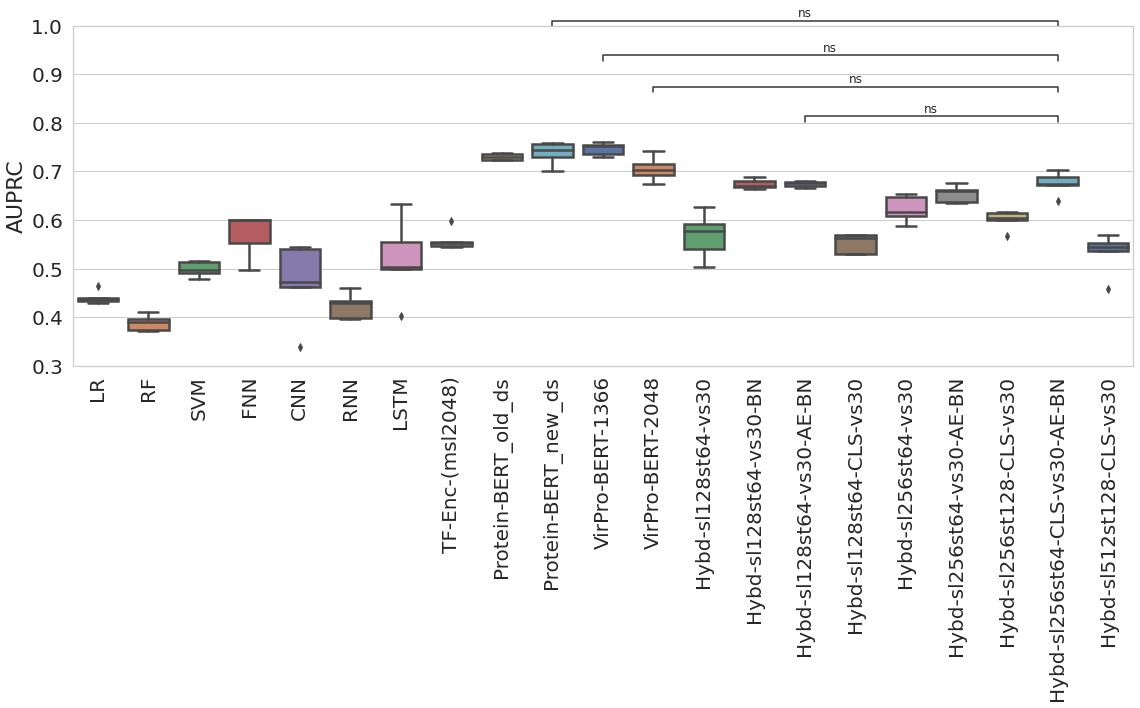

In [27]:
plot_boxplot_w_stat_tests(df, "auprc", "outside", ylim=(0.3, 1))

In [21]:
plot_boxplot_w_stat_tests(df, "auroc", location="outside", ylim=(0.8, 1.0))

KeyError: 'auroc'